In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

## 1. Statistic - 1 name

In [222]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.set_index('Years', inplace=True)
dataframe.drop('XXXX', inplace=True)
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')


In [223]:
dataframe.head(40)

,Gender,Name,Number of newborns
Years,,,
1980,male,A,3
1998,male,A,3
2009,male,AADAM,4
2014,male,AADAM,3
2016,male,AADAM,4
2017,male,AADAM,4
1976,male,AADEL,5
1978,male,AADEL,3
1980,male,AADEL,3


In [225]:
my_filter = lambda name: dataframe.Name == name
results = dataframe[my_filter('MILENA')]
results

,Gender,Name,Number of newborns
Years,,,
1923,female,MILENA,3
1927,female,MILENA,3
1931,female,MILENA,5
1932,female,MILENA,4
1942,female,MILENA,3
...,...,...,...
2013,female,MILENA,65
2014,female,MILENA,65
2015,female,MILENA,77


In [56]:
filter_years = (results.index >= 1930) & (results.index <= 1960)
results = results[filter_years]
results

,Gender,Name,Number of newborns
Years,,,
1931,female,MILENA,5
1932,female,MILENA,4
1942,female,MILENA,3
1948,female,MILENA,3
1949,female,MILENA,4
1951,female,MILENA,4
1954,female,MILENA,6
1955,female,MILENA,4
1956,female,MILENA,3


In [57]:
results_years = results.loc[:, ['Number of newborns']]
results_years

,Number of newborns
Years,
1931,5
1932,4
1942,3
1948,3
1949,4
1951,4
1954,6
1955,4
1956,3


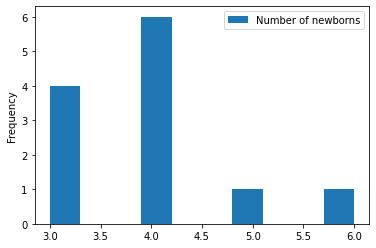

In [62]:
results_years.plot.hist()

In [63]:
results = results.groupby(pd.cut(results.index, np.arange(1930,1970, 10))).sum()

indexes = [''.join((str(x), '-', str(x+10))) for x in range(1930,1960, 10)]
results.index = indexes
results

,Number of newborns
1930-1940,9
1940-1950,10
1950-1960,28


In [71]:
records = dict(results['Number of newborns'])
records

{'1930-1940': 9, '1940-1950': 10, '1950-1960': 28}

In [72]:
records.values()

dict_values([9, 10, 28])

In [73]:
records.keys()

dict_keys(['1930-1940', '1940-1950', '1950-1960'])

<BarContainer object of 3 artists>

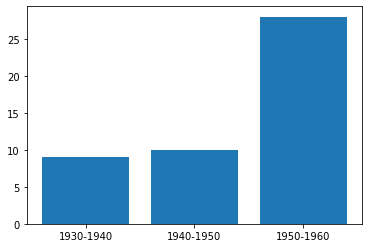

In [74]:
x_labels = records.keys()
y_labels = records.values()

plt.bar(x_labels, y_labels)

## 2. Compare names

In [78]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.set_index('Years', inplace=True)
dataframe.drop('XXXX', inplace=True)
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')

## 3. General statistics

In [257]:
dataframe = pd.read_csv('source/nat1900-2017.tsv', sep='\t')
dataframe.rename(columns={"sexe":"Gender", "preusuel":"Name","annais":"Years","nombre":"Number of newborns"}, inplace=True)
dataframe.index += 1
dataframe.Gender = dataframe.Gender.map({1:'male', 2:'female'})
dataframe.index = pd.to_numeric(dataframe.index,errors='coerce')

In [258]:
dataframe.head(10)

,Gender,Name,Years,Number of newborns
1,male,A,1980,3
2,male,A,1998,3
3,male,A,XXXX,22
4,male,AADAM,2009,4
5,male,AADAM,2014,3
6,male,AADAM,2016,4
7,male,AADAM,2017,4
8,male,AADAM,XXXX,9
9,male,AADEL,1976,5
10,male,AADEL,1978,3


In [259]:
dataframe_grouped = dataframe.groupby(['Name', 'Gender']).sum()
dataframe_grouped


,,Number of newborns
Name,Gender,
A,male,28
AADAM,male,24
AADEL,male,55
AADIL,male,177
AAKASH,male,25
...,...,...
ÎMRAN,male,33
ÏSSA,male,44
ÖMER,male,309


In [260]:
dataframe_grouped.reset_index()

,Name,Gender,Number of newborns
0,A,male,28
1,AADAM,male,24
2,AADEL,male,55
3,AADIL,male,177
4,AAKASH,male,25
...,...,...,...
34768,ÎMRAN,male,33
34769,ÏSSA,male,44
34770,ÖMER,male,309
34771,ÖZGE,female,28


In [261]:
most_popular = dataframe_grouped.sort_values(by='Number of newborns', ascending=False)
most_popular.reset_index(inplace=True)
most_popular.set_index('Name', inplace=True)
most_popular.head(40)

,Gender,Number of newborns
Name,,
MARIE,female,2234998
JEAN,male,1918735
PIERRE,male,890612
MICHEL,male,820224
_PRENOMS_RARES,female,794491
_PRENOMS_RARES,male,742158
ANDRÉ,male,711946
JEANNE,female,554298
PHILIPPE,male,538293


In [262]:
most_popular.drop('_PRENOMS_RARES', inplace=True)
most_popular = most_popular.head(100)
most_popular.to_csv('static/most_popular_.csv')

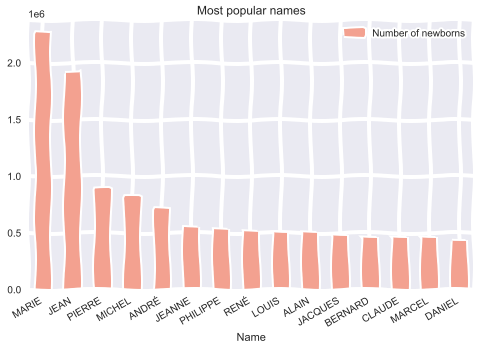

In [135]:
most_popular.head(15).plot.bar(color='#f3a190')
plt.title('Most popular names')
plt.xkcd()
plt.style.use('seaborn')
plt.gcf().autofmt_xdate(rotation=30)
plt.savefig('static/most_popular_names.jpg')